In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import r2_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import matthews_corrcoef

In [2]:
# Load IMDb dataset
df = pd.read_csv('IMDB Dataset.csv')
df.head()



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
from sklearn.preprocessing import LabelBinarizer
#Replace the value of negative and positive to 0 and 1
encoder = LabelBinarizer()
df['sentiment'] = encoder.fit_transform(df['sentiment'])
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


sentiment
1    25000
0    25000
Name: count, dtype: int64


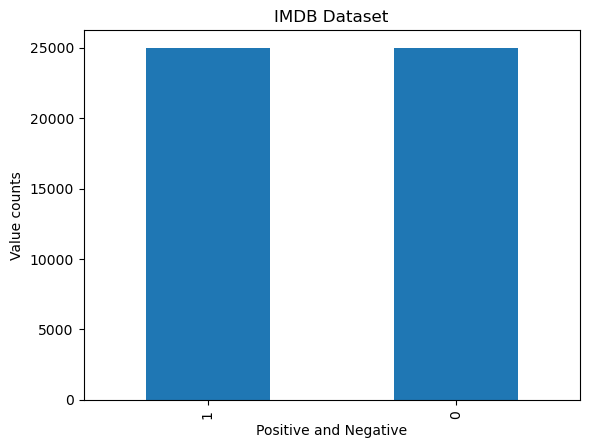

In [12]:
word_value = df['sentiment'].value_counts()
print(word_value)
word_value.plot(kind='bar')
plt.xlabel("Positive and Negative")
plt.ylabel("Value counts")
plt.title("IMDB Dataset")
plt.show()

In [5]:
# Preprocess the text data 
df['review'] = df['review'].str.lower()
df['review'] = df['review'].replace('[^\w\s]', '', regex=True)
df['review'] = df['review'].replace('<br />', '', regex=True)
df['review'] = df['review'].replace(r"https\S+|www\S+|http\S+", '', regex=True)
df['review'] 


0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [6]:
stop_words = set(stopwords.words('english'))

def stopword_tokenize(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the words back into a string
    return ' '.join(filtered_words)

df['review'] = df['review'].apply(stopword_tokenize)
df['review']

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

In [7]:
from collections import Counter

# Create a list of all words in the 'review' column
words = [word for review in df['review'] for word in review.split()]

# Count the frequency of each word
word_counts = Counter(words)

# Get the most common word
most_common_word = word_counts.most_common(10)
most_common_word

[('br', 113783),
 ('movie', 83510),
 ('film', 74452),
 ('one', 51024),
 ('like', 38990),
 ('good', 28569),
 ('even', 24573),
 ('would', 24024),
 ('time', 23257),
 ('really', 22948)]

In [8]:
# Split the dataset
X= df['review']
y= df['sentiment']
X_train = X[:40000]
y_train = y[:40000]
X_test = X[40000:]
y_test = y[40000:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_features=5000) 
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



(40000,)
(10000,)
(40000,)
(10000,)


In [9]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
lrpred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, lrpred)
report = classification_report(y_test, lrpred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4993
           1       0.87      0.88      0.87      5007

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



C:\Users\Windows10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

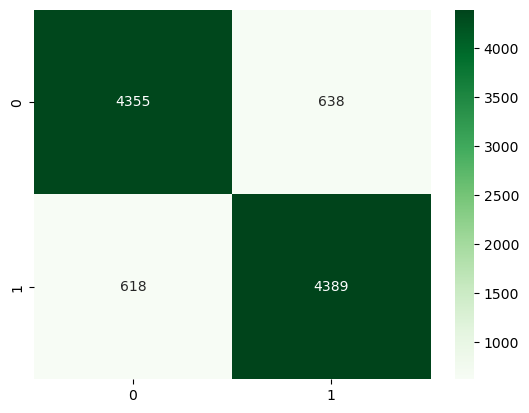

In [10]:
cmlr = confusion_matrix(y_test, lrpred)
sns.heatmap(cmlr, cmap="Greens",annot=True ,fmt='d')

In [11]:
# Calculate MCC
mcc = matthews_corrcoef(y_test, lrpred)
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.7488040914609135
